# Project 4

## Dmytro Romaniv
### Student ID: 151958

In [1]:
# Importing the Qiskit standard library and setting up an account
import math
import numpy as np
from math import sqrt
from numpy import pi 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import XGate
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_aer import Aer
from time import process_time

In [2]:
# qiskit 2.2.1
backend = Aer.get_backend('unitary_simulator')

In [3]:
# Construction of the Uf matrix
nn=3
oracle=np.identity(2**nn)
oracle[2,2]=-1
print(oracle)
Uf=Operator(oracle)
Operator.is_unitary(Uf) 


[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


True

In [4]:
# Creating quantum registers, 
# classical registers and a quantum circuit 
# representing the created Uf operator 
# Number of qubits and bits
n0=nn
# Quantum Register
q0 = QuantumRegister(n0)
# "Empty" quantum circuit
# for a gate named 'Uf'
CircuitUf = QuantumCircuit(q0,name='Uf')

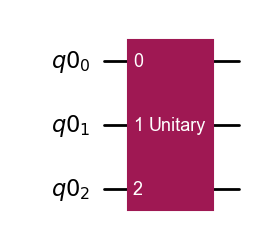

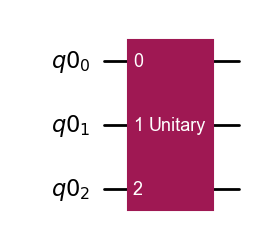

In [5]:
# Attaching the Uf operator to the circuit
# representing the Uf gate
CircuitUf.append(Uf,[q0[0],q0[1],q0[2]])
# Sketch of a quantum circuit
CircuitUf.draw(output='mpl')

In [6]:
# Transforming the Uf operator 
# into a uf quantum gate 
# denoted as Uf
uf=CircuitUf.to_gate()

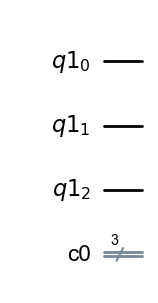

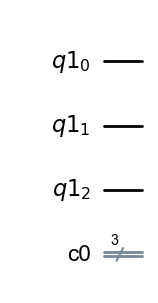

In [7]:
# Creating an "empty" warp
# quantum circuit of Grover's algorithm
# Number of qubits and bits
n=nn 
# Quantum Register
q = QuantumRegister(n) 
#  Classical Register
c = ClassicalRegister(n) 
# "Empty" quantum circuit -
# - the core of Grover's algorithm
Circuit = QuantumCircuit(q,c) 
# Sketch of a quantum circuit
Circuit.draw(output='mpl') 

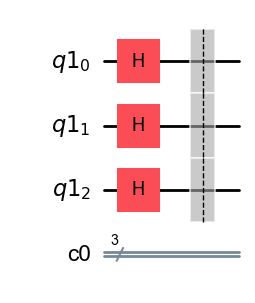

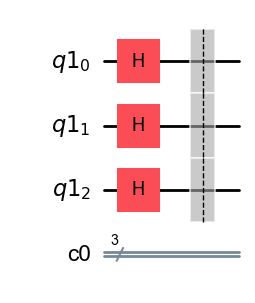

In [8]:
# |fi> State initiation 
Circuit.h(q[0])
Circuit.h(q[1])
Circuit.h(q[2])
Circuit.barrier()
# Sketch of a quantum circuit
Circuit.draw(output='mpl')

In [9]:
repeat=math.floor((pi/4)*sqrt(2**n))
print(repeat)

2


In [10]:
mccx=XGate().control(n0-1)

N= 1


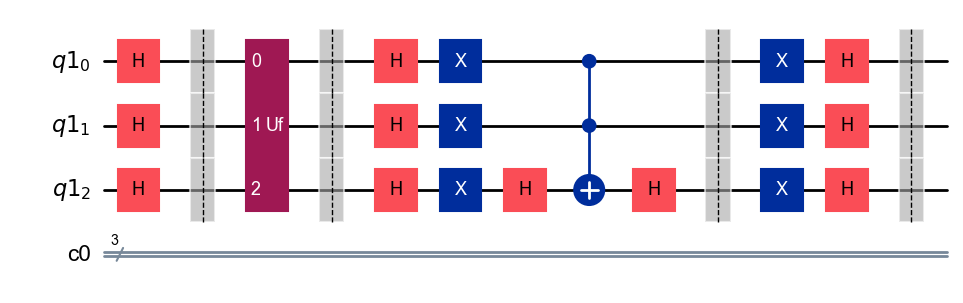

N= 2


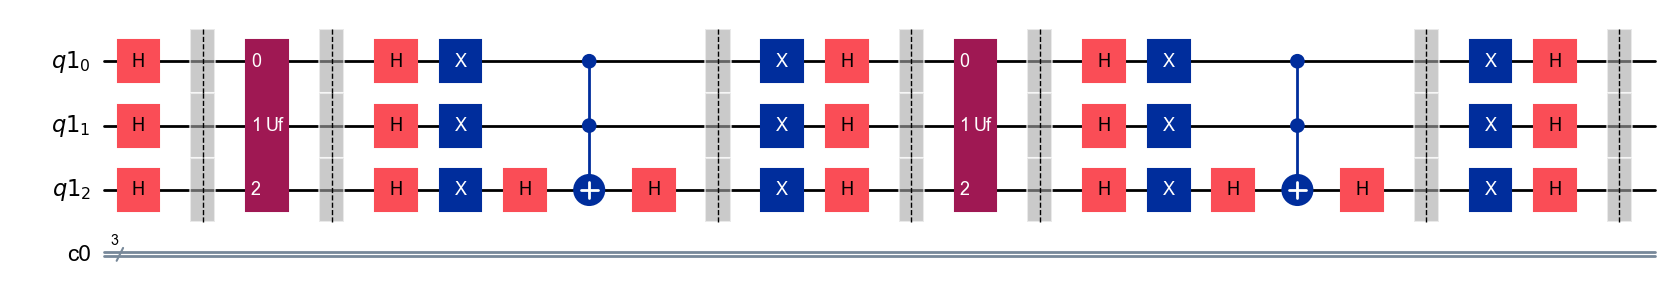

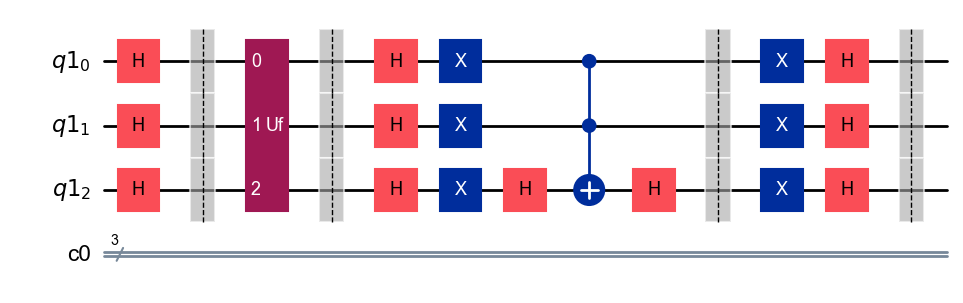

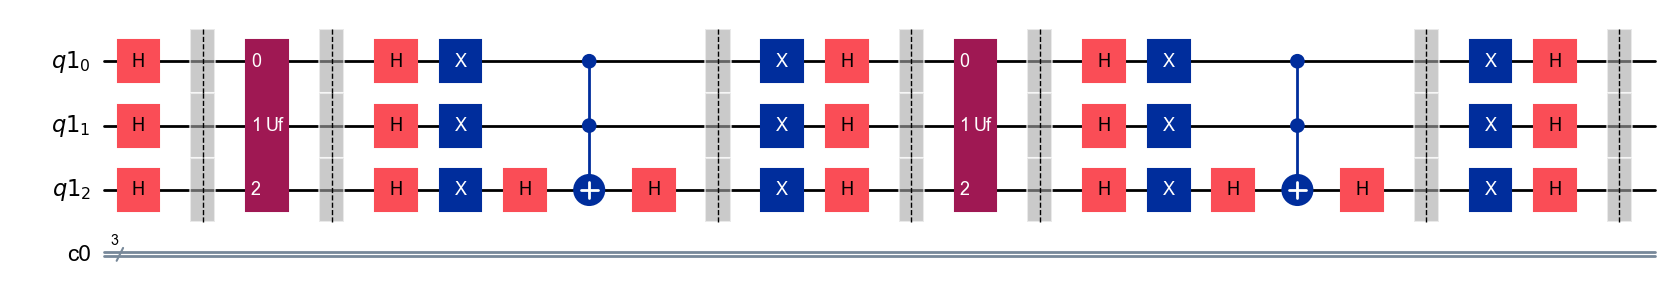

In [11]:
for ii in range(repeat):
    Circuit.append(uf,[0,1,2])
    Circuit.barrier() 
    # Beginning of the implementation of the W diffusion operator
    Circuit.h(q[0])
    Circuit.h(q[1])
    Circuit.h(q[2])
    Circuit.x(q[0])
    Circuit.x(q[1])
    Circuit.x(q[2])
    Circuit.h(q[2])
    Circuit.append(mccx, [q[0],q[1],q[2]])
    Circuit.h(q[2])
    Circuit.barrier()
    Circuit.x(q[0])
    Circuit.x(q[1])
    Circuit.x(q[2])
    Circuit.h(q[0])
    Circuit.h(q[1])
    Circuit.h(q[2]) 
    # The end of the implementation of the W diffusion operator
    Circuit.barrier()
    print("N=",ii+1)
    # print(Circuit)
    display(Circuit.draw(output='mpl'))

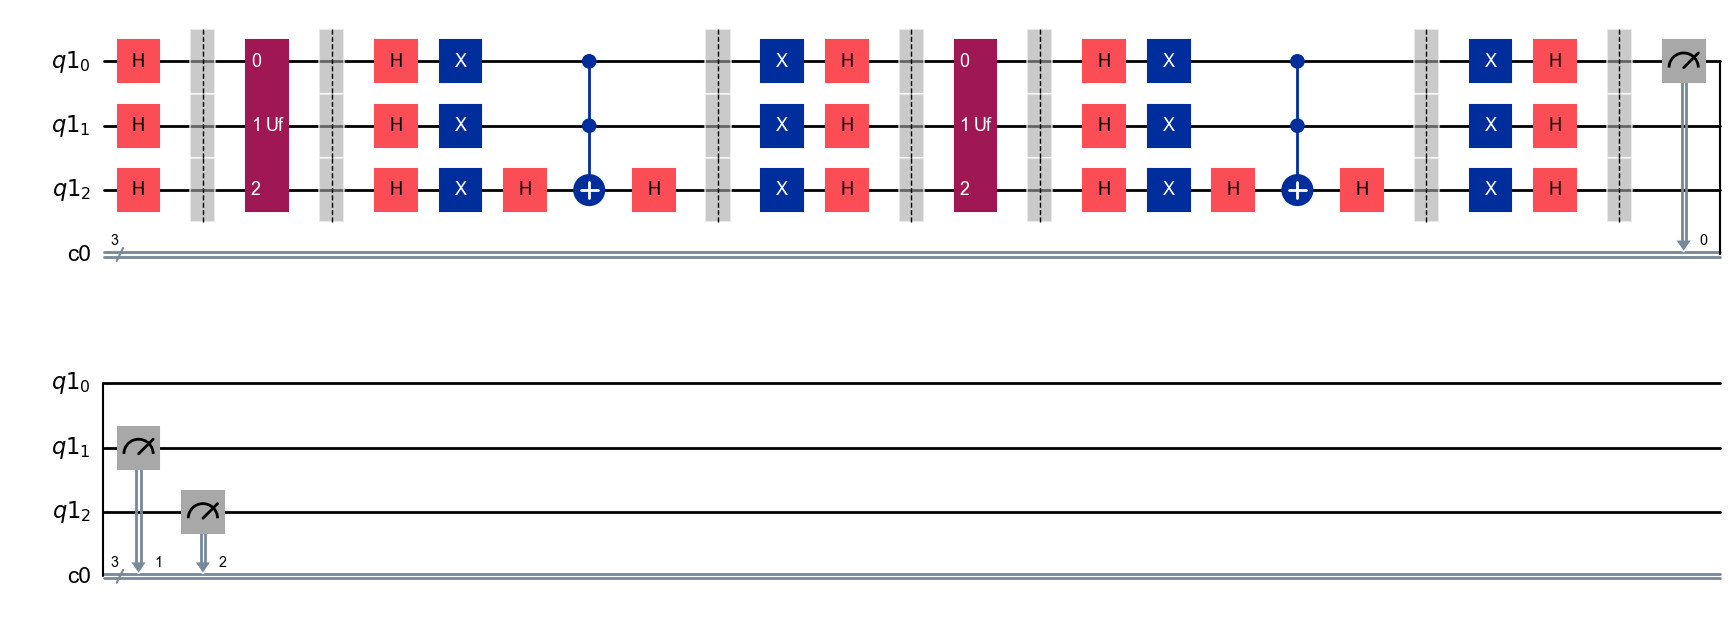

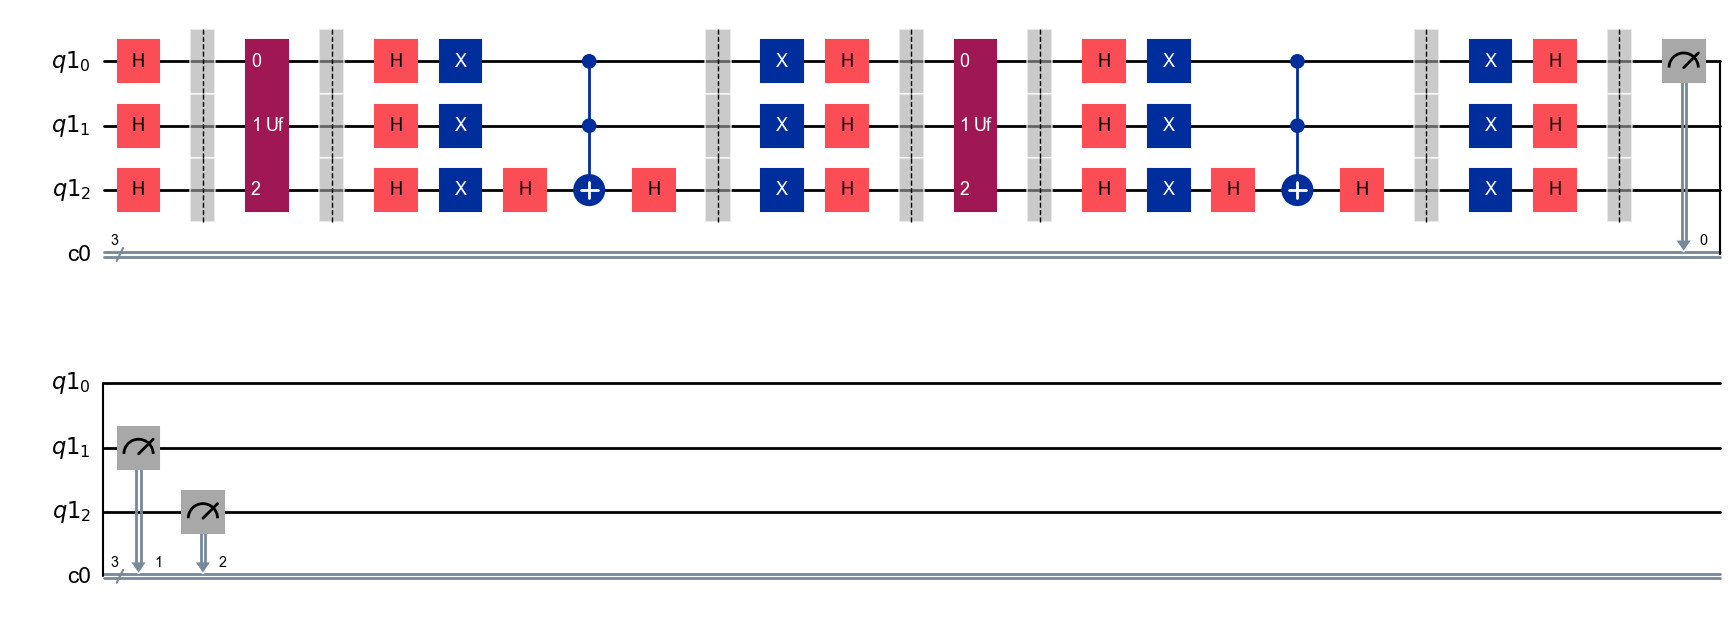

In [12]:
# Adding measurement operations to the quantum circuit
Circuit.measure(q[0],c[0])
Circuit.measure(q[1],c[1])
Circuit.measure(q[2],c[2])
Circuit.draw(output='mpl') # 

In [13]:
# Start the stopwatch / counter  
t1_start = process_time() 

In [14]:
# Select a quantum simulator (or processor).
backend_sim = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the specific backend (needed in qiskit 1.x)
transpiled_circuit = transpile(Circuit, backend_sim)

# Perform quantum calculations
job_sim0 = backend_sim.run(transpiled_circuit, shots=1024)
sim_result0 = job_sim0.result()

# Numerical presentation of measurement results
print(sim_result0.get_counts())

{'101': 8, '011': 12, '111': 6, '100': 13, '001': 11, '110': 4, '000': 7, '010': 963}


In [15]:
# Stop the stopwatch / counter 
t1_stop = process_time() 
print("Elapsed time:", t1_stop, t1_start)  
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)  

Elapsed time: 1.633869 1.465541
Elapsed time during the whole program in seconds: 0.16832800000000003


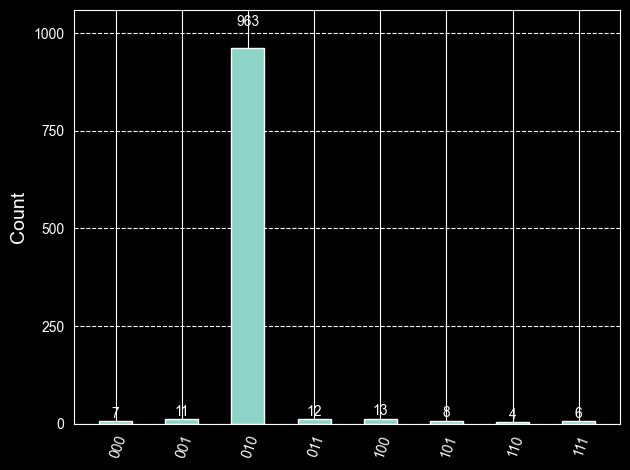

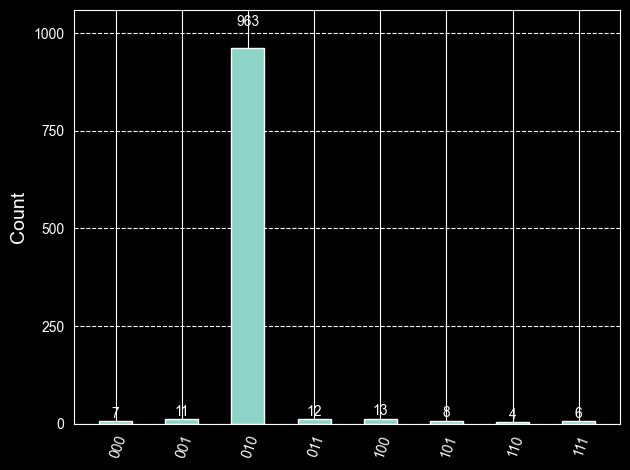

In [16]:
# Graphical presentation of X measurement results
plot_histogram(sim_result0.get_counts(Circuit))

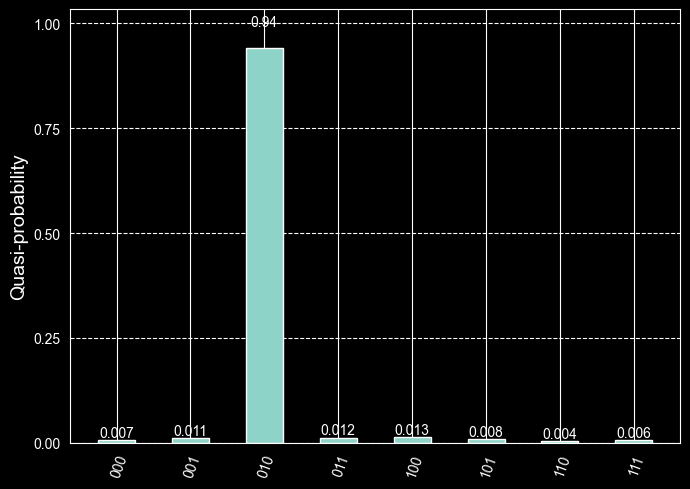

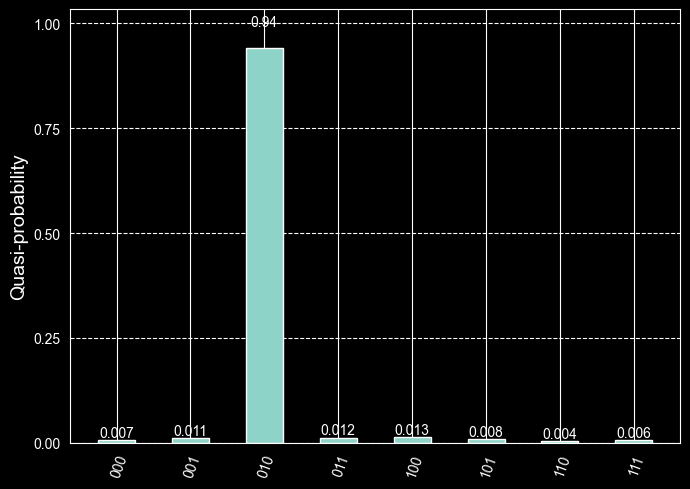

In [17]:
# Graphical presentation of X measurement results
plot_distribution(sim_result0.get_counts(Circuit))

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Operator

# --- TASK 1 ---
print("--- TASK 1: Optimal Iterations r ---")
print(f"{'n (Qubits)':<10} | {'N (States)':<10} | {'r (Iterations)':<15}")
print("-" * 40)

optimal_r_dict = {}

for n in range(2, 7):
    N = 2**n
    # Formula: floor( (pi/4) * sqrt(N) )
    r = math.floor((np.pi / 4) * math.sqrt(N))
    optimal_r_dict[n] = r
    print(f"{n:<10} | {N:<10} | {r:<15}")

--- TASK 1: Optimal Iterations r ---
n (Qubits) | N (States) | r (Iterations) 
----------------------------------------
2          | 4          | 1              
3          | 8          | 2              
4          | 16         | 3              
5          | 32         | 4              
6          | 64         | 6              


In [19]:
# --- TASK 2: Generic Grover Implementation ---

def create_phase_oracle(n, target_index):
    """Creates a diagonal Phase Oracle Operator for a specific target index."""
    matrix = np.eye(2**n, dtype=complex)
    matrix[target_index, target_index] = -1
    return Operator(matrix)

def add_diffuser(circuit, n):
    """Appends the Grover Diffuser (W operator) to the circuit."""
    # 1. Apply H to all
    circuit.h(range(n))
    # 2. Apply X to all
    circuit.x(range(n))

    # 3. Multi-controlled Z gate (implemented as H -> MCX -> H on the last qubit)
    circuit.h(n-1)

    # Create a Multi-Controlled X (Toffoli with n-1 controls)
    if n > 1:
        mcx_gate = XGate().control(n - 1)
        circuit.append(mcx_gate, list(range(n)))
    else:
        circuit.x(0)

    circuit.h(n-1)

    # 4. Apply X to all
    circuit.x(range(n))
    # 5. Apply H to all
    circuit.h(range(n))

def build_grover_circuit(n, target_index, iterations):
    """Builds the complete Grover circuit for n qubits and r iterations."""
    q_reg = QuantumRegister(n, 'q')
    c_reg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(q_reg, c_reg)

    # 1. Initialization |s> (Hadamard on all)
    qc.h(q_reg)

    # Prepare Oracle Operator
    oracle_op = create_phase_oracle(n, target_index)

    # 2. Grover Iterations (G = W * V)
    for _ in range(iterations):
        qc.barrier()
        # Apply Oracle (V)
        qc.append(oracle_op, range(n))

        qc.barrier()
        # Apply Diffuser (W)
        add_diffuser(qc, n)

    qc.barrier()
    # 3. Measurement
    qc.measure(q_reg, c_reg)

    return qc

print("Generic Grover functions defined successfully.")

Generic Grover functions defined successfully.


Student ID: 151958
Target state 'a' (decimal): 22
Target state 'a' (binary): 010110
Simulating up to s = 12 iterations...


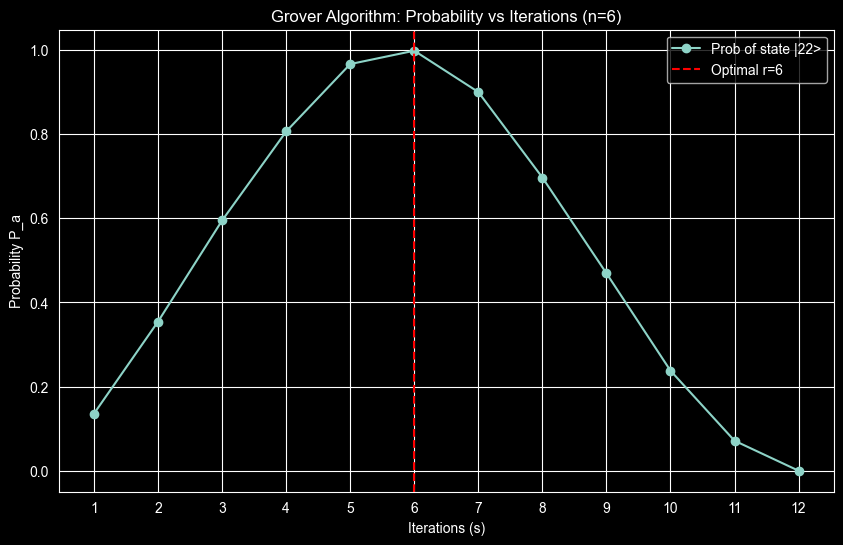

In [20]:
# --- TASKS 3 & 4: Probability vs Iterations for n=6 ---

STUDENT_ID = 151958
n_sim = 6
N_sim = 2**n_sim
target_a = STUDENT_ID % N_sim

# Calculate range for Task 4 (pi/2 * sqrt(N) is roughly 2 * optimal_r)
max_s = math.floor((np.pi / 2) * math.sqrt(N_sim))
print(f"Student ID: {STUDENT_ID}")
print(f"Target state 'a' (decimal): {target_a}")
print(f"Target state 'a' (binary): {format(target_a, '06b')}")
print(f"Simulating up to s = {max_s} iterations...")

probabilities = []
iterations_range = range(1, max_s + 1)

# Backend setup
backend_sim = Aer.get_backend('qasm_simulator')

for s in iterations_range:
    # Build circuit
    qc = build_grover_circuit(n_sim, target_a, s)

    # Transpile
    t_qc = transpile(qc, backend_sim)

    # Run
    # Using enough shots to get a decent probability estimate
    job = backend_sim.run(t_qc, shots=2048)
    result = job.result()
    counts = result.get_counts()

    # Get count for target state (convert decimal target to binary string key)
    target_bin = format(target_a, f'0{n_sim}b')

    # Extract count, default to 0 if state not found
    target_count = counts.get(target_bin, 0)
    prob = target_count / 2048
    probabilities.append(prob)

# Plotting Task 3 & 4
plt.figure(figsize=(10, 6))
plt.plot(iterations_range, probabilities, 'o-', label=f'Prob of state |{target_a}>')
plt.axvline(x=optimal_r_dict[n_sim], color='r', linestyle='--', label=f'Optimal r={optimal_r_dict[n_sim]}')
plt.title(f'Grover Algorithm: Probability vs Iterations (n={n_sim})')
plt.xlabel('Iterations (s)')
plt.ylabel('Probability P_a')
plt.xticks(iterations_range)
plt.grid(True)
plt.legend()
plt.show()

--- TASK 5: Simulation for n=2..6 with optimal r ---
n=2, Target=2 (10), r=1, Probability=1.0000
n=3, Target=6 (110), r=2, Probability=0.9512
n=4, Target=6 (0110), r=3, Probability=0.9717
n=5, Target=22 (10110), r=4, Probability=0.9993
n=6, Target=22 (010110), r=6, Probability=0.9976


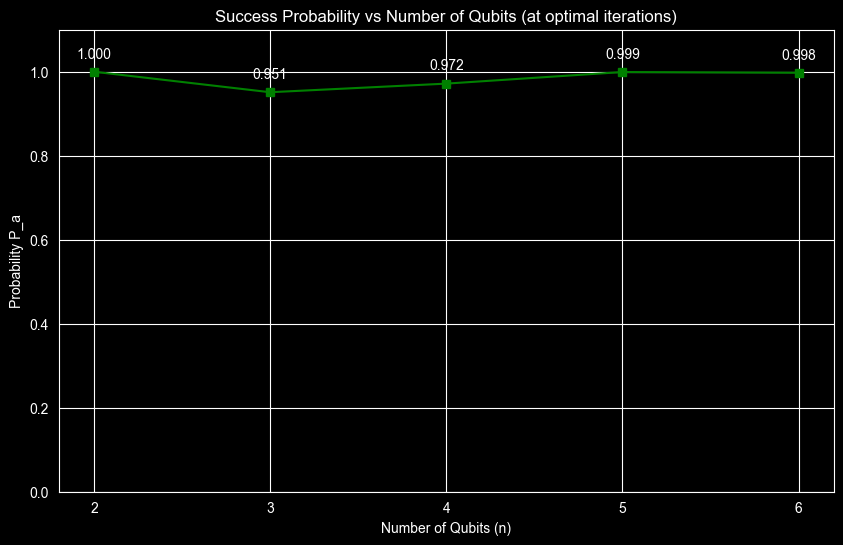

In [21]:
# --- TASK 5: Probability vs Number of Qubits (n) ---

print("--- TASK 5: Simulation for n=2..6 with optimal r ---")

n_values = range(2, 7)
success_probabilities = []

for n_curr in n_values:
    # 1. Determine Target
    N_curr = 2**n_curr
    target_curr = STUDENT_ID % N_curr
    target_bin_curr = format(target_curr, f'0{n_curr}b')

    # 2. Determine Optimal Iterations
    r_curr = optimal_r_dict[n_curr]

    # 3. Build and Run
    qc = build_grover_circuit(n_curr, target_curr, r_curr)
    t_qc = transpile(qc, backend_sim)

    # Run with high shots for precision
    shots = 4096
    job = backend_sim.run(t_qc, shots=shots)
    counts = job.result().get_counts()

    # 4. Calculate Probability
    count_hit = counts.get(target_bin_curr, 0)
    prob = count_hit / shots
    success_probabilities.append(prob)

    print(f"n={n_curr}, Target={target_curr} ({target_bin_curr}), r={r_curr}, Probability={prob:.4f}")

# Plotting Task 5
plt.figure(figsize=(10, 6))
plt.plot(n_values, success_probabilities, 's-', color='green')
plt.title('Success Probability vs Number of Qubits (at optimal iterations)')
plt.xlabel('Number of Qubits (n)')
plt.ylabel('Probability P_a')
plt.ylim(0, 1.1)
plt.grid(True)
plt.xticks(n_values)
for i, txt in enumerate(success_probabilities):
    plt.annotate(f"{txt:.3f}", (n_values[i], success_probabilities[i]),
                 textcoords="offset points", xytext=(0,10), ha='center')
plt.show()